In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch.nn as nn
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms

In [4]:
epochs = 100
batch_size = 100

input_size = 2
bottleneck_size = 1
hidden_size = 20
layers = 10
# satisfactory performance with: hidden size = 20 layers = 10

In [5]:
class Autoencoder(nn.Module):
    def __init__(self, input_size = 2, \
                 bottleneck_size = 1,
                 hidden_size = 10, layers = 2):
        super(Autoencoder, self).__init__()
        # self.input_size = input_size
        # self.bottleneck_size = bottleneck_size
        # self.hidden_size = hidden_size
        # self.layers = layers
        encoder_mod = [
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            ]
        decoder_mod = [
            nn.Linear(bottleneck_size, hidden_size),
            nn.ReLU(),
        ]
        for _ in range(layers):
            encoder_mod.append(nn.Linear(hidden_size,hidden_size))
            encoder_mod.append(nn.ReLU())
            decoder_mod.append(nn.Linear(hidden_size,hidden_size))
            decoder_mod.append(nn.ReLU())
        encoder_mod += [nn.Linear(hidden_size, bottleneck_size), nn.ReLU()]
        decoder_mod += [nn.Linear(hidden_size, input_size)]
        self.encoder = nn.Sequential(*encoder_mod)
        self.decoder = nn.Sequential(*decoder_mod)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [17]:
X, _ = make_moons(n_samples=1000, noise=0.1)
autoencoder = Autoencoder(input_size = input_size, \
                 bottleneck_size = bottleneck_size,
                 hidden_size = hidden_size, layers = layers)
loss = nn.MSELoss()
train_loader = DataLoader(dataset = torch.from_numpy(X), batch_size = batch_size, shuffle = True)
optimizer = optim.Adam(autoencoder.parameters())

In [18]:
for epoch in range(epochs):
    for data in train_loader:
        inputs = data.float()
        
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss_val = loss(outputs, inputs)
        loss_val.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss_val.item():.4f}')

Epoch [1/100], Loss: 0.5449
Epoch [2/100], Loss: 0.5772
Epoch [3/100], Loss: 0.5812
Epoch [4/100], Loss: 0.5320
Epoch [5/100], Loss: 0.4577
Epoch [6/100], Loss: 0.4608
Epoch [7/100], Loss: 0.4895
Epoch [8/100], Loss: 0.5190
Epoch [9/100], Loss: 0.4708
Epoch [10/100], Loss: 0.5674
Epoch [11/100], Loss: 0.4995
Epoch [12/100], Loss: 0.5162
Epoch [13/100], Loss: 0.4834
Epoch [14/100], Loss: 0.4983
Epoch [15/100], Loss: 0.5735
Epoch [16/100], Loss: 0.4761
Epoch [17/100], Loss: 0.4868
Epoch [18/100], Loss: 0.4813
Epoch [19/100], Loss: 0.5487
Epoch [20/100], Loss: 0.5624
Epoch [21/100], Loss: 0.4387
Epoch [22/100], Loss: 0.5351
Epoch [23/100], Loss: 0.5789
Epoch [24/100], Loss: 0.5146
Epoch [25/100], Loss: 0.5201
Epoch [26/100], Loss: 0.5338
Epoch [27/100], Loss: 0.5222
Epoch [28/100], Loss: 0.4420
Epoch [29/100], Loss: 0.5456
Epoch [30/100], Loss: 0.4448
Epoch [31/100], Loss: 0.2891
Epoch [32/100], Loss: 0.1954
Epoch [33/100], Loss: 0.1928
Epoch [34/100], Loss: 0.1952
Epoch [35/100], Loss: 0

Sometimes the loss decreases in a stable speed, while at certain times the loss does not decrease at all when the size of the neural network becomes too large.

In [19]:
# visualize effect of autoencoder
def plot_images(original, reconstructed):
    for i in range(len(original)):
        # print(original[i].numpy())
        plt.scatter(original[i].numpy()[0],original[i].numpy()[1], \
                    c = '#1f77b4')
        plt.scatter(reconstructed[i].numpy()[0], \
                    reconstructed[i].numpy()[1], c = '#ff7f0e')
    plt.show()

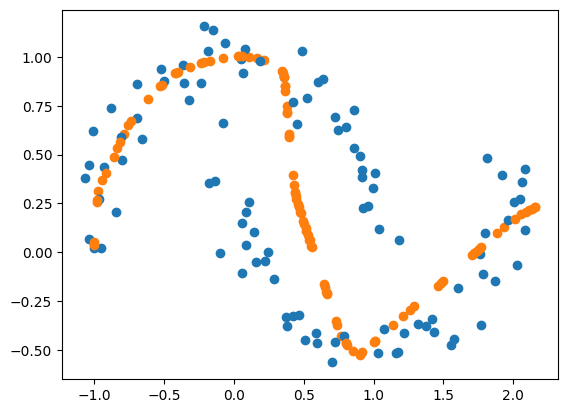

In [20]:
with torch.no_grad():
    test_data, _ = make_moons(n_samples=100, noise=0.1)
    test_data = torch.from_numpy(test_data).float()
    recon_data = autoencoder(test_data)
    plot_images(test_data, recon_data)

In [10]:
def histogram(X, BINS, visualize = False):
    # Create a 2D histogram
    hist, x_edges, y_edges = np.histogram2d(X[:, 0], X[:, 1], bins=BINS)
    # reserve the pdf for later use
    pdf = hist / hist.sum()
    if visualize:# Visualize the histogram
        plt.imshow(pdf, interpolation='nearest', origin='lower', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
        plt.colorbar()
        plt.show()
    return pdf

In [21]:
# sample uniformly from the space
sample_temp_x = torch.from_numpy(np.random.uniform(
    low = [-1.5,-1],
    high = [2.5, 2], 
    size = (1000,2))).float()
sample_temp_x = autoencoder(sample_temp_x).detach().numpy()

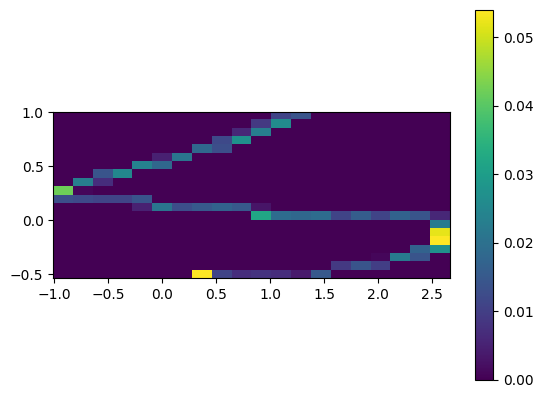

In [22]:
hist = histogram(sample_temp_x, 20, visualize = True)

In [23]:
from sklearn import mixture

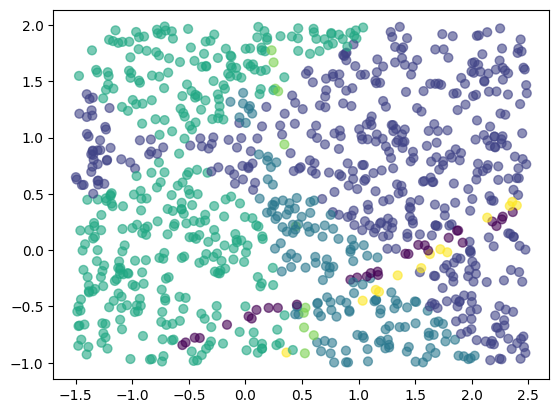

In [34]:
# TODO: fit GMM to the code dist. 
gmm_model = mixture.GaussianMixture(n_components= 6)
gmm_model.fit(sample_temp_x)
sample_x_pred = np.random.uniform(
    low = [-1.5,-1],
    high = [2.5, 2], 
    size = (1000,2))
sample_y_pred = gmm_model.predict(sample_x_pred)
# print(sample_x_pred)
plt.scatter(sample_x_pred[:,0],sample_x_pred[:,1],c = sample_y_pred, cmap='viridis', s=40, alpha=0.6 )

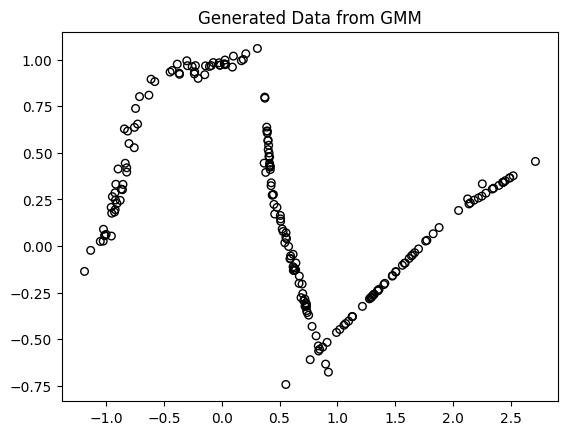

In [35]:
X_temp,_ = gmm_model.sample(200)
plt.scatter(X_temp[:, 0], X_temp[:, 1], marker='o', s=30, edgecolors='k', facecolors='none')
plt.title('Generated Data from GMM')
plt.show()

We tested with GMM component number ranging from 4 to 10.

6 components are sufficient to represent the distribution in a clear-cut way.

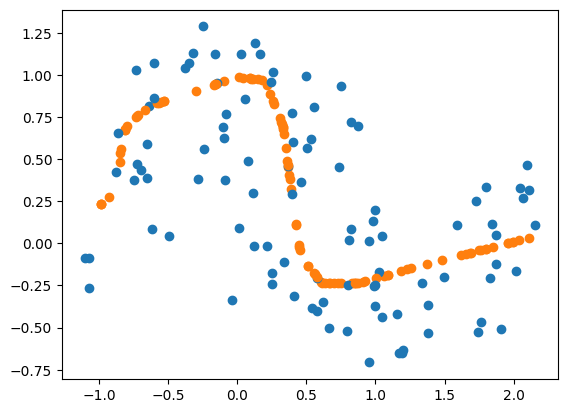

In [171]:
# noise level 0.2
with torch.no_grad():
    test_data, _ = make_moons(n_samples=100, noise=0.2)
    test_data = torch.from_numpy(test_data).float()
    recon_data = autoencoder(test_data)
    plot_images(test_data, recon_data)

In [65]:
epochs = 100

In [64]:
# noise level 0.2: retraining
X_2, _ = make_moons(n_samples=1000, noise=0.2)
autoencoder_2 = Autoencoder(input_size = input_size, \
                 bottleneck_size = bottleneck_size,
                 hidden_size = 20, layers = layers)
loss = nn.MSELoss()
train_loader = DataLoader(dataset = X_2, batch_size = batch_size, shuffle = True)
optimizer = optim.Adam(autoencoder_2.parameters())
for epoch in range(epochs):
    for data in train_loader:
        inputs = data.float()
        optimizer.zero_grad()
        #print(inputs)
        outputs = autoencoder_2(inputs)
        loss_val = loss(outputs, inputs)
        loss_val.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss_val.item():.4f}')

Epoch [1/1], Loss: 0.6492
Epoch [2/1], Loss: 0.6219
Epoch [3/1], Loss: 0.6558
Epoch [4/1], Loss: 0.5307
Epoch [5/1], Loss: 0.5228
Epoch [6/1], Loss: 0.5207
Epoch [7/1], Loss: 0.5607
Epoch [8/1], Loss: 0.5865
Epoch [9/1], Loss: 0.5319
Epoch [10/1], Loss: 0.5012
Epoch [11/1], Loss: 0.3512
Epoch [12/1], Loss: 0.2887
Epoch [13/1], Loss: 0.2584
Epoch [14/1], Loss: 0.2494
Epoch [15/1], Loss: 0.2614
Epoch [16/1], Loss: 0.2297
Epoch [17/1], Loss: 0.2244
Epoch [18/1], Loss: 0.1843
Epoch [19/1], Loss: 0.1875
Epoch [20/1], Loss: 0.1705
Epoch [21/1], Loss: 0.1288
Epoch [22/1], Loss: 0.1321
Epoch [23/1], Loss: 0.1181
Epoch [24/1], Loss: 0.1345
Epoch [25/1], Loss: 0.0976
Epoch [26/1], Loss: 0.1003
Epoch [27/1], Loss: 0.1162
Epoch [28/1], Loss: 0.1093
Epoch [29/1], Loss: 0.0851
Epoch [30/1], Loss: 0.0993
Epoch [31/1], Loss: 0.1063
Epoch [32/1], Loss: 0.1103
Epoch [33/1], Loss: 0.0817
Epoch [34/1], Loss: 0.0811
Epoch [35/1], Loss: 0.1065
Epoch [36/1], Loss: 0.0946
Epoch [37/1], Loss: 0.1100
Epoch [38/

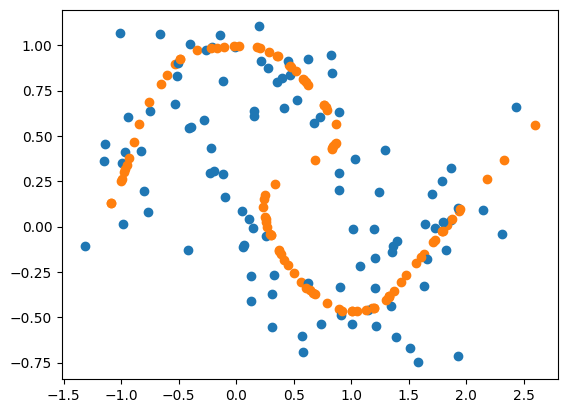

In [117]:
with torch.no_grad():
    test_data, _ = make_moons(n_samples=100, noise=0.2)
    test_data = torch.from_numpy(test_data).float()
    recon_data = autoencoder(test_data)
    plot_images(test_data, recon_data)

The geometry of the generated data changes alongside the increasing noise, as the moon shapes and also the discrepancy between the two clusters are more clearly shown.

2. 2d without bottleneck

In [40]:
def bandwidth_generator(bandwidth_number, minimal_val):
    band = [minimal_val,]
    for _ in range(bandwidth_number-1):
        band.append(band[0]*2)
    return band
def MMD_rbf(X, Y, bandwidth_num = 7, bandwidth_min = 0.1):
    """
    uses the squared exponential (RBF)
    X, Y: tensor
    """
    X_norm = (X ** 2).sum(dim=1, keepdim=True)
    Y_norm = (Y ** 2).sum(dim=1, keepdim=True)
    band_list = bandwidth_generator(bandwidth_num, bandwidth_min)
    mmd = 0
    dist_xy = X_norm - 2 * X.matmul(Y.t()) + Y_norm.t()
    dist_xx = X_norm - 2 * X.matmul(X.t()) + X_norm.t()
    dist_yy = Y_norm - 2 * Y.matmul(Y.t()) + Y_norm.t()
    n = X.size(0)
    m = Y.size(0)
    for gamma in band_list:
        K_xx = torch.exp(-gamma*dist_xx)
        K_xy = torch.exp(-gamma*dist_xy)
        K_yy = torch.exp(-gamma*dist_yy)
        mmd += (1/(n * (n - 1)))*K_xx.sum()\
        - (2.0 / (n * m)) * K_xy.sum() + (1.0 / (m * (m - 1))) * K_yy.sum()

    return mmd

In [57]:
def inverse_normal_cdf(uniform_samples):
    return torch.erfinv(2 * uniform_samples - 1) * np.sqrt(2)

In [68]:
X_2, _ = make_moons(n_samples=1000, noise=0.2)
autoencoder_2 = Autoencoder(input_size = input_size, \
                 bottleneck_size = 2,
                 hidden_size = 20, layers = layers)
epochs = 1
train_loader = DataLoader(dataset = X_2, batch_size = batch_size, shuffle = True)
optimizer = optim.Adam(autoencoder_2.parameters())
# implement standard normal as reference
normal_samples = torch.rand(1000, 2)
for epoch in range(100):
    for data in train_loader:
        inputs = data.float()
        optimizer.zero_grad()
        #print(inputs)
        outputs = autoencoder_2(inputs)
        output_gaussian = inverse_normal_cdf(normal_samples)
        output_autoencoder = autoencoder_2(normal_samples)
        # print(output_gaussian)
        # print(output_autoencoder)
        # print(MMD_rbf(outputs, inputs))
        loss_1 = nn.MSELoss()
#loss_1(outputs, inputs)
        loss_val =  \
             MMD_rbf(output_autoencoder, output_gaussian)
        loss_val.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss_val.item():.4f}')

tensor([[ 0.8451,  0.2107],
        [ 0.1696, -0.4251],
        [-0.6576,  0.2748],
        ...,
        [-0.7708, -0.6795],
        [ 0.7986, -0.7027],
        [-1.5493,  1.2891]])
tensor([[-0.0428, -0.2665],
        [-0.0428, -0.2665],
        [-0.0428, -0.2665],
        ...,
        [-0.0428, -0.2665],
        [-0.0428, -0.2665],
        [-0.0428, -0.2665]], grad_fn=<AddmmBackward0>)
tensor([[ 0.8451,  0.2107],
        [ 0.1696, -0.4251],
        [-0.6576,  0.2748],
        ...,
        [-0.7708, -0.6795],
        [ 0.7986, -0.7027],
        [-1.5493,  1.2891]])
tensor([[-0.0427, -0.2624],
        [-0.0427, -0.2624],
        [-0.0427, -0.2624],
        ...,
        [-0.0427, -0.2624],
        [-0.0427, -0.2624],
        [-0.0427, -0.2624]], grad_fn=<AddmmBackward0>)
tensor([[ 0.8451,  0.2107],
        [ 0.1696, -0.4251],
        [-0.6576,  0.2748],
        ...,
        [-0.7708, -0.6795],
        [ 0.7986, -0.7027],
        [-1.5493,  1.2891]])
tensor([[-0.0427, -0.2583],
        [-

KeyboardInterrupt: 

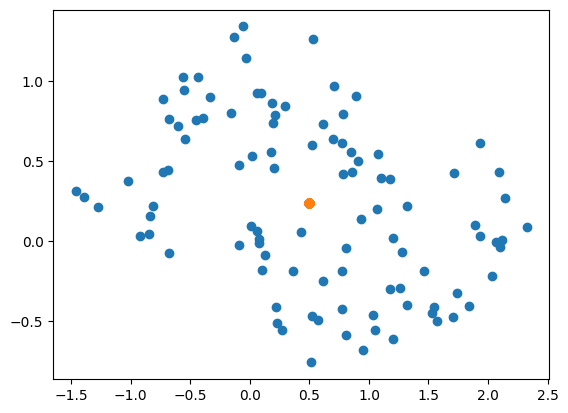

In [ ]:
with torch.no_grad():
    test_data, _ = make_moons(n_samples=100, noise=0.2)
    test_data = torch.from_numpy(test_data).float()
    recon_data = autoencoder_2(test_data)
    plot_images(test_data, recon_data)

In [ ]:
#chatgpt ref for task3
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Hyperparameters
input_size = 28 * 28
hidden_size = 64
batch_size = 64
learning_rate = 0.001
num_epochs = 10

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Initialize the autoencoder
autoencoder = Autoencoder(input_size, hidden_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)

# Training the autoencoder
for epoch in range(num_epochs):
    for data in train_loader:
        inputs, _ = data
        inputs = inputs.view(-1, input_size)
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Example usage of the trained autoencoder
with torch.no_grad():
    test_data = next(iter(train_loader))[0][:5]
    test_data = test_data.view(-1, input_size)
    reconstructed_data = autoencoder(test_data)

    # Display the original and reconstructed images
    import matplotlib.pyplot as plt

    def plot_images(original, reconstructed):
        fig, axes = plt.subplots(nrows=2, ncols=len(original), figsize=(len(original) * 2, 4))
        for i in range(len(original)):
            axes[0, i].imshow(original[i].view(28, 28).numpy(), cmap='gray')
            axes[0, i].axis('off')
            axes[1, i].imshow(reconstructed[i].view(28, 28).numpy(), cmap='gray')
            axes[1, i].axis('off')

    plot_images(test_data, reconstructed_data)
    plt.show()
